# Dynamic mode decomposition

---

Near the end of this video, it was emphasized that there are many problems that don't require machine learning to solve.


a simple fluid flow using dynamic mode decomposition

https://www.youtube.com/watch?v=sQvrK8AGCAo
https://www.youtube.com/watch?v=lx-msllg1kU



sometimes a simple model exists for a system 
a ML answer would require lots of training, lots of data, and lots of computation
ML with millions of parameters may be able to do it -- -but overkill
occam's razor

more can be found here: http://dmdbook.com/

https://people.math.wisc.edu/~chr/am205/g_act/dmd_slides.pdf

dict_keys(['__header__', '__version__', '__globals__', 'CC'])
Shape of 'CC': (64, 3)
Type of 'CC': <class 'numpy.ndarray'>


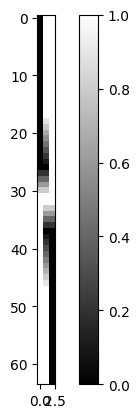

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the .mat file
mat_data = loadmat("CODE/CH02_FLUIDS/CCcool.mat")

# Inspect the keys to see what data is available
print(mat_data.keys())

# Extract the 'CC' data
image_data = mat_data['CC']

# Check the shape and type of the 'CC' data to confirm it's suitable for visualization
print(f"Shape of 'CC': {image_data.shape}")
print(f"Type of 'CC': {type(image_data)}")

# Display the data as an image
# Assuming the data is 2D or 3D, and suitable for image display
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
path1 = "DATA/FLUIDS/CYLINDER_ALL.mat"
path2 = "DATA/FLUIDS/CYLINDER_basis.mat"

In [5]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Define the paths to the files
path1 = "DATA/FLUIDS/CYLINDER_ALL.mat"
path2 = "DATA/FLUIDS/CYLINDER_basis.mat"

# Load the first .mat file (ALL)
data_all = loadmat(path1)
print(data_all.keys())  # Check what data is available

# Extract the relevant data from 'ALL.mat', e.g., the key might be 'VORTALL'
vorticity_data = data_all['VORTALL']

# Verify the shape and type
print(f"Shape of 'VORTALL': {vorticity_data.shape}")
print(f"Type of 'VORTALL': {type(vorticity_data)}")

# Load the second .mat file (basis)
data_basis = loadmat(path2)
print(data_basis.keys())  # Check what data is available

# Extract relevant information (replace with the correct key names if necessary)
mean_vorticity = data_basis['mean_vorticity_field']
leading_pod_modes = data_basis['vortPHI']

# Select a specific snapshot from 'VORTALL', e.g., the first snapshot (index 0)
snapshot_index = 0
vorticity_snapshot = vorticity_data[snapshot_index, :, :]

# Plot the selected snapshot
plt.figure(figsize=(8, 6))
plt.imshow(vorticity_snapshot, cmap='jet', origin='lower')
plt.colorbar(label='Vorticity')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Vorticity Snapshot {snapshot_index}')
plt.show()


dict_keys(['__header__', '__version__', '__globals__', 'UALL', 'UEXTRA', 'VALL', 'VEXTRA', 'VORTALL', 'VORTEXTRA', 'm', 'n', 'nx', 'ny'])
Shape of 'VORTALL': (89351, 151)
Type of 'VORTALL': <class 'numpy.ndarray'>
dict_keys(['__header__', '__version__', '__globals__', 'vortAVG', 'vortPHI', 'vortUNSTEADY'])


KeyError: 'mean_vorticity_field'

dict_keys(['__header__', '__version__', '__globals__', 'UALL', 'UEXTRA', 'VALL', 'VEXTRA', 'VORTALL', 'VORTEXTRA', 'm', 'n', 'nx', 'ny'])
Shape of 'VORTALL': (89351, 151)
Type of 'VORTALL': <class 'numpy.ndarray'>
dict_keys(['__header__', '__version__', '__globals__', 'vortAVG', 'vortPHI', 'vortUNSTEADY'])


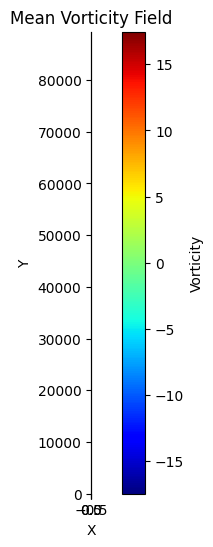

In [6]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Define the paths to the files
path1 = "DATA/FLUIDS/CYLINDER_ALL.mat"
path2 = "DATA/FLUIDS/CYLINDER_basis.mat"

# Load the first .mat file (ALL)
data_all = loadmat(path1)
print(data_all.keys())  # Check available data keys

# Extract the relevant data from 'ALL.mat', such as the vorticity field
vorticity_data = data_all['VORTALL']
print(f"Shape of 'VORTALL': {vorticity_data.shape}")
print(f"Type of 'VORTALL': {type(vorticity_data)}")

# Load the second .mat file (basis)
data_basis = loadmat(path2)
print(data_basis.keys())  # Check what data is available

# Extract the mean vorticity field and leading POD modes
mean_vorticity = data_basis['vortAVG']
leading_pod_modes = data_basis['vortPHI']

# Plot the mean vorticity field
plt.figure(figsize=(8, 6))
plt.imshow(mean_vorticity, cmap='jet', origin='lower')
plt.colorbar(label='Vorticity')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mean Vorticity Field')
plt.show()


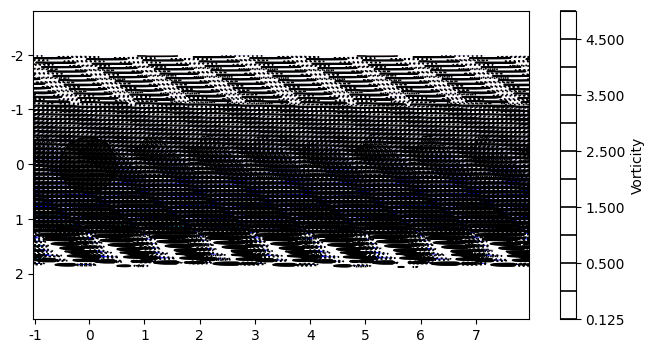

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.io import loadmat

# Define paths to the .mat files
path_all = "DATA/FLUIDS/CYLINDER_ALL.mat"
path_cc = "CODE/CH02_FLUIDS/CCcool.mat"

# Load the ALL data
data_all = loadmat(path_all)
vort_all = data_all['VORTALL']
nx = int(data_all['nx'][0][0])
ny = int(data_all['ny'][0][0])

# Load the custom colormap
data_cc = loadmat(path_cc)
cc_array = data_cc['CC']

# Create a colormap from the CC array
cc_map = LinearSegmentedColormap.from_list("custom_colormap", cc_array, N=256)

def plot_cylinder(vort, nx, ny, cmap):
    vortmin, vortmax = -5, 5
    vort[vort > vortmax] = vortmax
    vort[vort < vortmin] = vortmin

    # Create figure
    plt.figure(figsize=(8, 4))
    plt.imshow(vort, cmap=cmap, origin='lower')

    # Adjust ticks
    x_ticks = [1, 50, 100, 150, 200, 250, 300, 350, 400, 449]
    x_labels = ['-1', '0', '1', '2', '3', '4', '5', '6', '7', '8']
    y_ticks = [1, 50, 100, 150, 199]
    y_labels = ['2', '1', '0', '-1', '-2']
    plt.xticks(x_ticks, x_labels)
    plt.yticks(y_ticks, y_labels)

    # Contour lines
    levels_pos = [0.125, 0.25] + list(np.arange(0.5, 5.5, 0.5))
    levels_neg = [-5.5] + list(np.arange(-5, -0.5, 0.5)) + [-0.25, -0.125]
    plt.contour(vort, levels_neg, colors='k', linestyles=':', linewidths=1.2)
    plt.contour(vort, levels_pos, colors='k', linestyles='-', linewidths=1.2)

    # Draw the cylinder
    theta = np.linspace(0, 2 * np.pi, 100)
    x = 49 + 25 * np.sin(theta)
    y = 99 + 25 * np.cos(theta)
    plt.fill(x, y, color=[0.3, 0.3, 0.3])
    plt.plot(x, y, color='k', linewidth=1.2)

    plt.axis('equal')
    plt.colorbar(label='Vorticity')
    plt.show()

# Calculate the mean vorticity
vort_avg = np.mean(vort_all, axis=1)
vort_avg_reshaped = np.reshape(vort_avg, (nx, ny))

# Plot the mean vorticity
plot_cylinder(vort_avg_reshaped, nx, ny, cmap=cc_map)


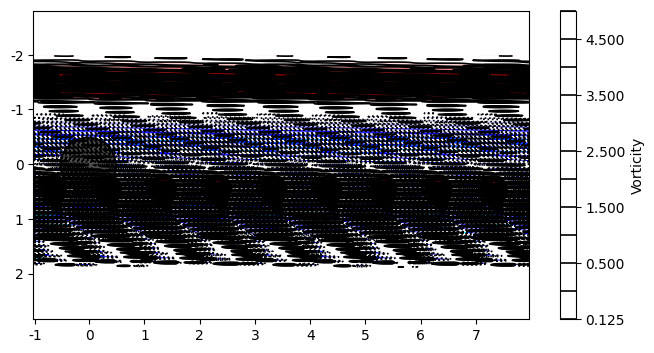

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.io import loadmat

# Define paths to the .mat files
path_all = "DATA/FLUIDS/CYLINDER_ALL.mat"
path_cc = "CODE/CH02_FLUIDS/CCcool.mat"

# Load the ALL data
data_all = loadmat(path_all)
vort_all = data_all['VORTALL']
nx = int(data_all['nx'][0][0])
ny = int(data_all['ny'][0][0])

# Load the custom colormap
data_cc = loadmat(path_cc)
cc_array = data_cc['CC']

# Create a colormap from the CC array
cc_map = LinearSegmentedColormap.from_list("custom_colormap", cc_array, N=256)

def plot_cylinder(vort, nx, ny, cmap):
    vortmin, vortmax = -5, 5
    vort[vort > vortmax] = vortmax
    vort[vort < vortmin] = vortmin

    # Create figure
    plt.figure(figsize=(8, 4))
    plt.imshow(vort, cmap=cmap, origin='lower')

    # Adjust ticks
    x_ticks = [1, 50, 100, 150, 200, 250, 300, 350, 400, 449]
    x_labels = ['-1', '0', '1', '2', '3', '4', '5', '6', '7', '8']
    y_ticks = [1, 50, 100, 150, 199]
    y_labels = ['2', '1', '0', '-1', '-2']
    plt.xticks(x_ticks, x_labels)
    plt.yticks(y_ticks, y_labels)

    # Contour lines
    levels_pos = [0.125, 0.25] + list(np.arange(0.5, 5.5, 0.5))
    levels_neg = [-5.5] + list(np.arange(-5, -0.5, 0.5)) + [-0.25, -0.125]
    plt.contour(vort, levels_neg, colors='k', linestyles=':', linewidths=1.2)
    plt.contour(vort, levels_pos, colors='k', linestyles='-', linewidths=1.2)

    # Draw the cylinder
    theta = np.linspace(0, 2 * np.pi, 100)
    x = 49 + 25 * np.sin(theta)
    y = 99 + 25 * np.cos(theta)
    plt.fill(x, y, color=[0.3, 0.3, 0.3])
    plt.plot(x, y, color='k', linewidth=1.2)

    plt.axis('equal')
    plt.colorbar(label='Vorticity')
    plt.show()




# Select the appropriate time step (replace 0 with your desired time step index)
time_step = 0

# Slice out the single column for that specific time step
vort_snapshot = vort_all[:, time_step]

# Reshape the selected snapshot into the desired 2D format (nx, ny)
vort_reshaped = np.reshape(vort_snapshot, (nx, ny))

# Plot the single time-step snapshot
plot_cylinder(vort_reshaped, nx, ny, cmap=cc_map)
